# __COMPUTATION II: ALGORITHMS & DATA STRUCTURES__

# PROJECT

Group Name: GROUP 17

Group Members: Carolina Ferreira, Catarina Bernardes, Matilde Carvalho

Student Numbers: 20231719, 20231609, 20231659 

--------------------------
**Don't change or modify the order and titles of this notebook.** However, feel free to add as many cells as you want between sections. 

Good luck!

# Section 1: Dataset

Read and store the dataset file provided to you (`sales_dataset_group_<X>.pkl`).

Store the dataset under the variable name `dataset`.

In [1]:
import pickle

with open("sales_dataset_group_17.pkl", "rb") as f:
    dataset = pickle.load(f)
dataset

[{'Name': 'Bernardo',
  'Date': '2023-09-25',
  'Item': 'notebook',
  'Unit Price': 3,
  'Quantity': 4},
 {'Name': 'Constança',
  'Date': '2024-01-22',
  'Item': 'tshirt',
  'Unit Price': 15,
  'Quantity': 5},
 {'Name': 'Armaan',
  'Date': '2023-09-25',
  'Item': 'water',
  'Unit Price': 0.3,
  'Quantity': 1},
 {'Name': 'Ashool',
  'Date': '2023-12-04',
  'Item': 'tshirt',
  'Unit Price': 15,
  'Quantity': 3},
 {'Name': 'Ashool',
  'Date': '2023-10-28',
  'Item': 'pen',
  'Unit Price': 2.5,
  'Quantity': 5},
 {'Name': 'Ashool',
  'Date': '2024-02-03',
  'Item': 'donation_voucher',
  'Unit Price': 7,
  'Quantity': 2},
 {'Name': 'Filipe',
  'Date': '2024-01-05',
  'Item': 'beer',
  'Unit Price': 1.2,
  'Quantity': 1},
 {'Name': 'Pedro',
  'Date': '2023-11-28',
  'Item': 'lecture_notes',
  'Unit Price': 2.3,
  'Quantity': 2},
 {'Name': 'Victoriya',
  'Date': '2023-09-13',
  'Item': 'party_ticket',
  'Unit Price': 9,
  'Quantity': 1},
 {'Name': 'Maryam',
  'Date': '2023-10-17',
  'Item': '

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy.stats as stats

import timeit

In [3]:
# Trying to understand the data

In [4]:
# Size of the dataset
len(dataset)

1426

In [5]:
# Are all elements in the dataset dictionaries? YES
count = 0

# Iterate over each element in the dataset
for item in dataset:
    # Check if the current element is a dictionary
    if isinstance(item, dict):
        # If it is a dictionary, increment the counter by one
        count += 1

# Print the final count of dictionaries in the dataset
count

1426

In [6]:
# Do all dictionaries have 5 keys? YES
count_correct = 0
count_wrong = 0
# Iterate over each element in the dataset
for item in dataset:
    # Check if the length of the current element is 5
    if len(item) == 5:
        # If the length is 5, increment the correct counter by one
        count_correct += 1
    else:
        # If the length is not 5, increment the wrong counter by one
        count_wrong += 1

# Print the final counts of correct and wrong lengths
print(f"All the {count_correct} dictionaries have 5 keys and {count_wrong} dictionaries do not have 5 keys.")

All the 1426 dictionaries have 5 keys and 0 dictionaries do not have 5 keys.


In [7]:
# Do all dictionaries have 5 values? NO
count_complete = 0
count_incomplete = 0
# Iterate over each element in the dataset
for item in dataset:
    # Check if all values in the current dictionary are not None
    all_values_not_none = all(value is not None for value in item.values())
    
    # If all values are not None, increment the complete counter
    if all_values_not_none:
        count_complete += 1
    else:
        count_incomplete += 1
        print(item)

# Print the final counts of complete and incomplete items
print(f"{count_complete} dictionaries have 5 values and {count_incomplete} have missing values.")

{'Name': 'Krish', 'Date': '2023-10-31', 'Item': 'RAND', 'Unit Price': None, 'Quantity': 4}
{'Name': 'Wilker', 'Date': '2024-01-11', 'Item': 'RAND', 'Unit Price': None, 'Quantity': 4}
1424 dictionaries have 5 values and 2 have missing values.


In [8]:
#Are all "Name" keys of the type string? YES
count_complete = 0
count_incomplete = 0
# Iterate over each element in the dataset
for item in dataset:
    # Check if the 'Name' key exists in the dictionary and its value is a string
    if isinstance(item.get('Name'), str):
        count_complete += 1
    else:
        count_incomplete += 1
        print(item)

# Print the final counts of complete and incomplete items
print(f"{count_complete} 'Name' keys are strings and {count_incomplete} are not.")

1426 'Name' keys are strings and 0 are not.


In [9]:
#Do all dates have the same format? YES
count_correct_format = 0
count_incorrect_format = 0

# Iterate over each element in the dataset
for item in dataset:
    # Get the value associated with the 'Date' key
    date_value = item.get('Date')
    
    # Check if 'Date' value exists and if it has the correct format (three parts separated by '-')
    if date_value and len(date_value.split('-')) == 3:
        # Split the date into year, month, and day
        year, month, day = date_value.split('-')
        
        # Check if all parts are digits and if they have the correct lengths
        if (
            all(part.isdigit() for part in [year, month, day])
        ) and (
            len(year) == 4 and len(month) == 2 and len(day) == 2
        ):
            # If the date is in the correct format, increment the correct format counter
            count_correct_format += 1
        else:
            # If the date is not in the correct format, increment the incorrect format counter
            count_incorrect_format += 1
            # Print the current item which has incorrect date format
            print(item)
    else:
        # If the 'Date' value is missing or doesn't have three parts, increment the incorrect format counter
        count_incorrect_format += 1
        # Print the current item which has incorrect date format
        print(item)

# Print the final counts of correct and incorrect date formats
print(f"{count_correct_format} dates have a valid format and {count_incorrect_format} have a non valid format.")

1426 dates have a valid format and 0 have a non valid format.


In [10]:
#Are all dates valid? YES
# Initialize a dictionary to count the correctness of years, months, and days
counts = {key: 0 for key in ['year_right', 'month_right', 'day_right', 'year_wrong', 'month_wrong', 'day_wrong']}

# Iterate over each element in the dataset
for item in dataset:
    # Split the 'Date' value into year, month, and day, converting them to integers
    year, month, day = map(int, item.get('Date').split('-'))
    
    # Check if the year is in the range 2001 to 2024 inclusive and update the appropriate counter
    counts['year_right' if 2000 < year <= 2024 else 'year_wrong'] += 1
    
    # Check if the month is in the range 1 to 12 inclusive and update the appropriate counter
    counts['month_right' if 1 <= month <= 12 else 'month_wrong'] += 1
    
    # Check if the day is in the range 1 to 31 inclusive and update the appropriate counter
    counts['day_right' if 1 <= day <= 31 else 'day_wrong'] += 1
    
    # If any part of the date is wrong, print the current item
    if not (2000 < year <= 2024) or not (1 <= month <= 12) or not (1 <= day <= 31):
        print(item)

    # Extra verification to ensure that although the date is valid, the entry happened before or on the current day (1st March)
    if year == 2024 and (month > 3 or (month == 3 and day > 1)):
        print(item)

# Print the final counts of correct and incorrect years, months, and days
print(counts)

{'year_right': 1426, 'month_right': 1426, 'day_right': 1426, 'year_wrong': 0, 'month_wrong': 0, 'day_wrong': 0}


In [11]:
#Are all "Item" keys of the type string? NO
def is_item_string(dataset):
    """
    Counts the number of dictionaries in the dataset where the value associated 
    with the 'Item' key is a string and where it is not a string or does not exist.

    Parameters:
    dataset (list): A list of dictionaries to be checked.

    Returns:
    tuple: A tuple containing two integers:
        - count_complete: The count of dictionaries where 'Item' is a string.
        - count_incomplete: The count of dictionaries where 'Item' is not a string or is missing.
    """
    count_complete = 0
    count_incomplete = 0
    # Iterate over each element in the dataset
    for item in dataset:
        # Check if the 'Item' key exists in the dictionary and its value is a string
        if isinstance(item.get('Item'), str):
            # If 'Item' is a string, increment the complete counter
            count_complete += 1
        else:
            # If 'Item' is not a string or doesn't exist, increment the incomplete counter
            count_incomplete += 1
    return count_complete, count_incomplete

item_str_count = is_item_string(dataset)
print(f"{item_str_count[0]} 'Item' keys are of type string and {item_str_count[1]} are not.")

1285 'Item' keys are of type string and 141 are not.


In [12]:
#Do all "Unit Price" key are of the type int or float? NO
def is_unitprice_number(dataset):
    """
    Counts the number of dictionaries in the dataset where the value associated
    with the 'Unit Price' key is a number (either an integer or a float) and where it is not a number or does not exist.

    Parameters:
    dataset (list): A list of dictionaries to be checked.

    Returns:
    tuple: A tuple containing two integers:
        - count_complete: The count of dictionaries where 'Unit Price' is a number (int or float).
        - count_incomplete: The count of dictionaries where 'Unit Price' is not a number or is missing.
    """
    count_complete = 0
    count_incomplete = 0
    # Iterate over each element in the dataset
    for item in dataset:
        # Check if the 'Unit Price' key exists in the dictionary and its value is an integer or a float
        if isinstance(item.get('Unit Price'), (int, float)):
            # If 'Unit Price' is an integer or a float, increment the complete counter
            count_complete += 1
        else:
            # If 'Unit Price' is not an integer or a float or doesn't exist, increment the incomplete counter
            count_incomplete += 1
    return count_complete, count_incomplete

unitprice_number_count = is_unitprice_number(dataset)
print(f"{unitprice_number_count[0]} 'Unit Price' keys are of the type int or float\n" 
      f"and {unitprice_number_count[1]} are not a number or the value is missing.")

1352 'Unit Price' keys are of the type int or float
and 74 are not a number or the value is missing.


In [13]:
# Number of entries that have "RAND" in them
def has_rand(dataset):
    """
    Counts the number of dictionaries in the dataset that contain the value 'RAND'
    and prints each dictionary that contains 'RAND'.

    Parameters:
    dataset (list): A list of dictionaries to be checked.

    Returns:
    int: The count of dictionaries where the value 'RAND' is present.
    """
    # Initialize a counter variable to zero
    counter = 0
    # Iterate over each dictionary in the dataset
    for dictionary in dataset:
        # Check if any of the values in the dictionary are equal to 'RAND'
        if 'RAND' in dictionary.values():
            # If 'RAND' is found, increment the counter by one
            counter += 1
            # Print the current dictionary which contains 'RAND'
            print(dictionary)
    return counter

rand_counter = has_rand(dataset)
rand_counter

{'Name': 'Bruno', 'Date': '2024-01-16', 'Item': 'RAND', 'Unit Price': 'RAND', 'Quantity': 3}
{'Name': 'Juliana', 'Date': '2024-01-12', 'Item': 'RAND', 'Unit Price': 'RAND', 'Quantity': 3}
{'Name': 'Zain', 'Date': '2024-02-29', 'Item': 'RAND', 'Unit Price': 'RAND', 'Quantity': 4}
{'Name': 'Krish', 'Date': '2023-10-31', 'Item': 'RAND', 'Unit Price': None, 'Quantity': 4}
{'Name': 'Khadija', 'Date': '2023-12-03', 'Item': 'RAND', 'Unit Price': 'RAND', 'Quantity': 2}
{'Name': 'Wilker', 'Date': '2024-01-11', 'Item': 'RAND', 'Unit Price': None, 'Quantity': 4}


6

In [14]:
# Count the amount of entries where the "Item" key and the "Unit Price" key are switched
def item_and_unit_price_switched(dataset):
    """
    Counts the number of dictionaries in the dataset where the 'Item' key contains
    a number (either an integer or a float) and the 'Unit Price' key contains a string.

    Parameters:
    dataset (list): A list of dictionaries to be checked.

    Returns:
    int: The count of dictionaries where 'Item' is a number and 'Unit Price' is a string.
    """
    counter = 0
    # Iterate over each element in the dataset
    for element in dataset:
        # Check if 'Item' is an integer or a float, and 'Unit Price' is a string
        if (
            isinstance(element["Item"], (int, float))
        ) and (
            isinstance(element.get("Unit Price"), str)
        ):
            # If both conditions are met, increment the counter by one
            counter += 1
    return counter

iu_switched_counter = item_and_unit_price_switched(dataset)
print(f"There are {iu_switched_counter} entries where the 'Item' key and the 'Unit Price' key are switched.")

There are 68 entries where the 'Item' key and the 'Unit Price' key are switched.


Later in the project (SECTION 2) a verification is made to ensure that after switching the values of these 2 keys, there aren't any new items not initially in the table of prices (defined below), any duplicates or any incorrect price (for this project, items only have 1 price).

<b>From the 141 "Item" keys that are not str, there are 68 (74-6) "Unit Price" keys with
values of string type, meaning that we can switch them in order to clean this data (IN SECTION 2)</b>
<br><br>
<b>This dataset is artificially made, meaning that we cannot conclude about the nature of the errors that caused the "RAND" and None appearance. In order to clean the dataset these entries will be removed (IN SECTION 2)</b>

In [15]:
#Are all "quantity" positive and bigger than 0 integers? YES
count_complete = 0
count_incomplete = 0
# Iterate over each item in the dataset
for item in dataset:
    # Check if 'Quantity' key exists in the dictionary and its value is an integer greater than 0
    if isinstance(item.get('Quantity'), int) and item.get('Quantity') > 0:
        # If 'Quantity' is a positive integer, increment the complete counter
        count_complete += 1
    else:
        # If 'Quantity' is not a positive integer or doesn't exist, increment the incomplete counter
        count_incomplete += 1
        # Print the current item which has an incomplete or invalid 'Quantity' value
        print(item)

# Print the final counts of complete and incomplete items
print(f"{count_complete} 'Quantity' keys are positive and bigger than 0 integers while {count_incomplete} are not.")

1426 'Quantity' keys are positive and bigger than 0 integers while 0 are not.


In [16]:
def both_item_and_unitprice_numbers(entry):
    """
    Checks if the 'Item' and 'Unit Price' fields in a given entry are numbers (either int or float).

    Parameters:
        entry (dict): A dictionary that contains an 'Item' and 'Unit Price' keys.

    Returns:
        bool: True if both 'Item' and 'Unit Price' keys in the dictionary correspond to numbers (int or float), False otherwise.
    """
    if (
        isinstance(entry.get('Item'), (int, float))
    ) and (
        isinstance(entry.get('Unit Price'), (int, float))
    ):
        return True
    else:
        return False

In [17]:
# Counting how many entries in the dataset have numbers (int or floats) in both their unit price and item: 73
def number_number(dataset):
    """
    Counts the number of dictionaries in the dataset where both 'Item' and 'Unit Price' are numeric values.

    Parameters:
    dataset (list): A list of dictionaries to be checked.

    Returns:
    int: The count of dictionaries where both 'Item' and 'Unit Price' are numeric values.
    """
    counter = 0
    # Iterate over each element in the dataset
    for element in dataset:
        # Check if both 'Item' and 'Unit Price' are numeric values
        if both_item_and_unitprice_numbers(element):
            # If both are numeric, increment the counter by one
            counter += 1
    return counter

number_number_counter = number_number(dataset)
print(f"There are {number_number_counter} entries in the dataset have numbers (int or floats) in both 'Unit Price' and 'Item' keys.")

There are 73 entries in the dataset have numbers (int or floats) in both 'Unit Price' and 'Item' keys.


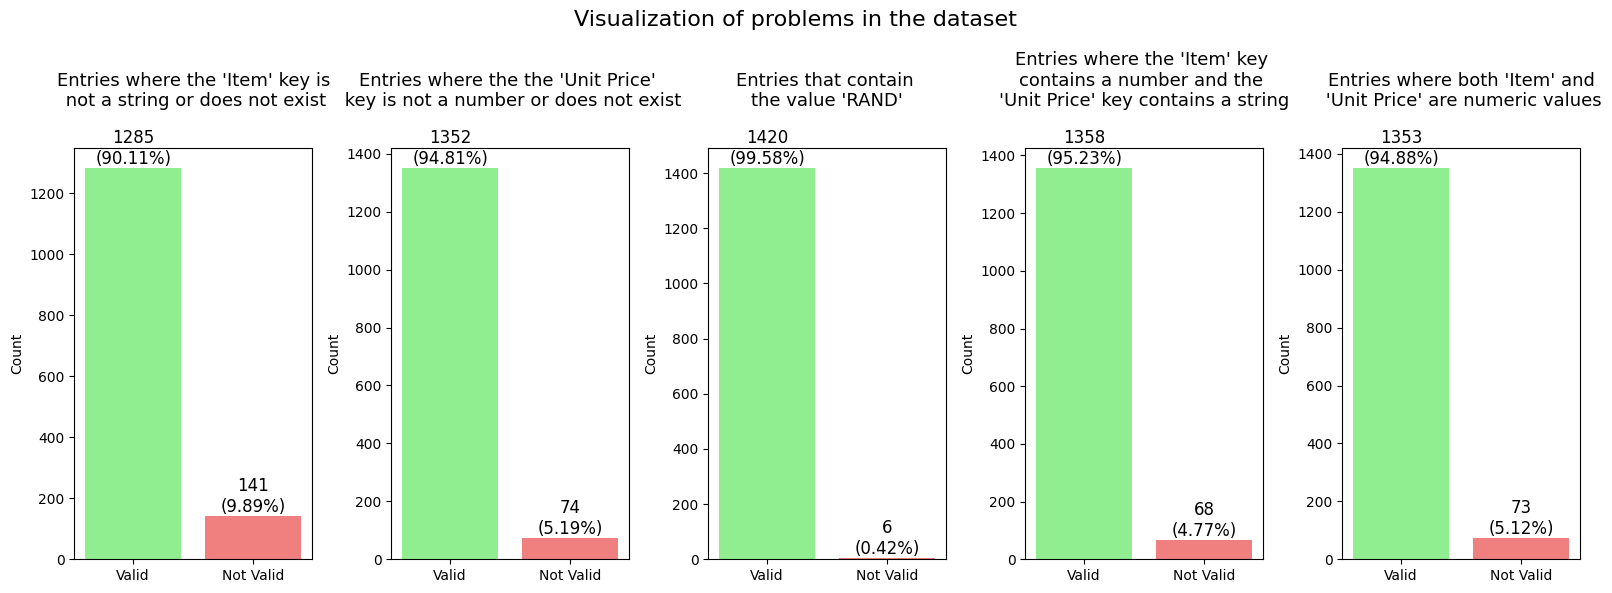

In [18]:
# Show the problems in the dataset.
def show_problems(dataset, item_str_count, unitprice_number_count, rand_counter, iu_switched_counter, number_number_counter):
    """
    Visualizes the problems found in a dataset using bar charts.

    Parameters:
    dataset (list of dict): The dataset being analyzed.
    item_str_count (tuple): Tuple containing 2 ints: count_complete - count of entries where the 'Item' key is a string, and 
                                                     count_incomplete - count of dictionaries where 'Item' is not a string or is missing.
    unitprice_number_count (tuple): Tuple containing 2 ints: count_complete - count of entries where the 'Unit Price' key is a number
                                                             count_incomplete - count of where 'Unit Price' is not a number or is missing.
    rand_counter (int): The count of entries containing the value 'RAND'.
    iu_switched_counter (int): The count of entries where the 'Item' key contains a number and the 'Unit Price' key contains a string.
    number_number_counter (int): The count of entries where both 'Item' and 'Unit Price' are numeric values.

    Returns:
    None

    Notes:
    - It is necessary to have Matplotlib installed to display the table.
    """
    # Prepare the data to be displayed
    n = len(dataset)
    info_to_show = [item_str_count, 
                    unitprice_number_count, 
                    (n - rand_counter, rand_counter), 
                    (n - iu_switched_counter, iu_switched_counter), 
                    (n - number_number_counter, number_number_counter)]

    # Titles for the bar charts
    info_titles = ["Entries where the 'Item' key is\n not a string or does not exist",
                  "Entries where the the 'Unit Price' \n key is not a number or does not exist",
                  "Entries that contain \nthe value 'RAND'",
                  "Entries where the 'Item' key \ncontains a number and the \n'Unit Price' key contains a string",
                  "Entries where both 'Item' and\n 'Unit Price' are numeric values"]

    # Create subplots
    fig, axes = plt.subplots(1, len(info_to_show), figsize=(16, 6)) 

    # Iterate over each problem to visualize
    for i, info in enumerate(info_to_show):
        valid_count = info[0]
        not_valid_count = info[1]
    
        # Bar chart data
        counts = [valid_count, not_valid_count]
        labels = ["Valid", "Not Valid"]
        ax = axes[i] if len(info_to_show) > 1 else axes 
        
        # Create bar chart
        bars = ax.bar(labels, counts, color=['lightgreen', 'lightcoral'])

        # Add text annotations to bars
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            percentage = (count / n) * 100
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({percentage:.2f}%)', ha='center', va='bottom', fontsize = 12)

        # Set axis labels and title
        ax.set_ylabel('Count')
        ax.set_title(info_titles[i], fontsize = 13, pad=30)

    # Adjust layout and set overall title
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.subplots_adjust(top=0.75)
    plt.suptitle('Visualization of problems in the dataset', fontsize=16)
    plt.show()

show_problems(dataset, item_str_count, unitprice_number_count, rand_counter, iu_switched_counter, number_number_counter)

['coffee', 'photocopy', 'lecture_notes', 'donation_voucher', 'water', 'tshirt', 'notebook', 'pen', 'chocolate', 'party_ticket', 'RAND', 'hoodie', 'snack_pack', 'flash_drive', 'concert_ticket', 'game_ticket', 'printing', 'beer', 'water_bottle']

{'notebook': [3], 'tshirt': [15], 'water': [0.3], 'pen': [2.5], 'donation_voucher': [7], 'beer': [1.2], 'lecture_notes': [2.3], 'party_ticket': [9], 'hoodie': [27], 'game_ticket': [6.5], 'coffee': [0.6], 'flash_drive': [5], 'printing': [0.2], 'RAND': ['RAND', None], 'water_bottle': [0.8], 'photocopy': [0.3], 'chocolate': [1.5], 'concert_ticket': [10], 'snack_pack': [1.3]}


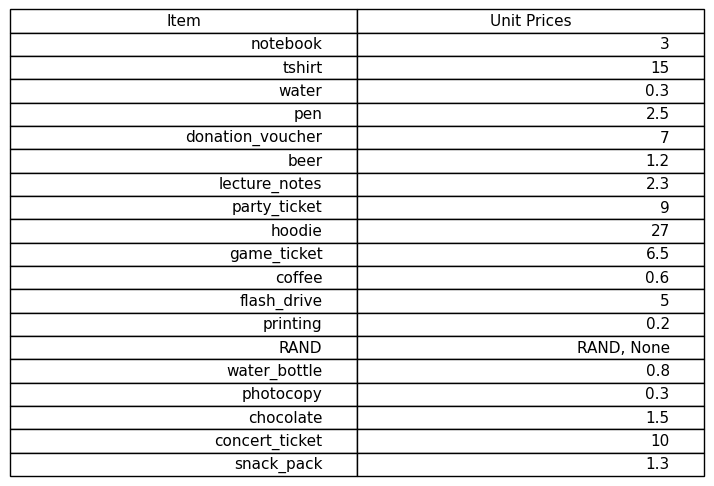

In [19]:
def list_and_price_table(dataset):
    """
    Extracts unique item names and their prices from the dataset,
    and displays them in a table.

    Parameters:
    dataset (list of dict): A list of dictionaries where each dictionary
                            represents an item with keys 'Item' and 'Unit Price'.
    Returns:
    None
    
    Notes:
    - The function assumes that the dataset contains entries with the keys 'Item' and 'Unit Price'.
    - It is necessary to have Matplotlib installed to display the table.
    - The function prints the intermediate results (str_items and item_prices) for debugging purposes.
    """
    
    # Extract unique item names
    str_items = list({entry["Item"] for entry in dataset if isinstance(entry["Item"], str)})
    print(str_items)
    
    # Create a dictionary of item prices
    item_prices = {}
    for entry in dataset:
        item, price = entry.get('Item'), entry.get('Unit Price')
        if isinstance(item, str):
            if item not in item_prices:
                item_prices[item] = []
            if price not in item_prices[item]:
                item_prices[item].append(price)
    
    print()
    print(item_prices)
    
    # Prepare table data and display it
    fig, ax = plt.subplots()
    ax.axis('off')
    table_data = [[item, ', '.join(map(str, prices))] for item, prices in item_prices.items()]
    table = ax.table(cellText=table_data, colLabels=['Item', 'Unit Prices'], loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.4, 1.4)
    plt.show()

    return str_items, item_prices

str_items, item_prices = list_and_price_table(dataset)

This table (more specifically, its information) will allow us to clean some of the "number Items" (entries that have numbers instead of strings in the "Item" key) by analyzing their price and replacing the "Item number" by the corresponding "item name" (IN SECTION 2).

In [20]:
#Finding out if any of the "number items" corresponds to a specific item
# Filter the dataset to include only entries where both 'Item' and 'Unit Price' are numeric
dataset_with_numbers_only = [entry for entry in dataset if both_item_and_unitprice_numbers(entry)]

# Create a set of unique unit prices from the item_prices dictionary
unit_prices_set = {price[0] for price in item_prices.values()}

# Filter the dataset_with_numbers_only to include only entries with unit prices that match those in the unit_prices_set
matching_entries = [entry for entry in dataset_with_numbers_only if entry["Unit Price"] in unit_prices_set]

# Print the number of matching entries
print(len(matching_entries))

21


<b>These 21 entries have their price associated with a specific "item name", meaning that we will be able to clean them (IN SECTION 2)</b>

# Section 2: Fixing problems in the dataset

Fix here any problems you may find in the dataset while you're developing the project. 

**Do not modify the dataset anywhere else except in this section!**

In [21]:
#ORIENTACION OF THE PROJECT: The value associated with the ’Date’ key is a string that contains a date in the format of “DD-MM-YYYY”. 
        #The first element corresponds to the day of the purchase, the second to the month, and the third to the year.
# Swap the day and year of each date in the dataset
# Iterate over each item in the dataset
for item in dataset:
    # Split the date string into its parts using '-' as the separator
    date_parts = item["Date"].split('-')
    
    # Swap the year and day parts in the date
    date_parts[0], date_parts[2] = date_parts[2], date_parts[0]
    
    # Initialize an empty string to store the modified date
    str1 = ""
    
    # Iterate over the date parts except for the last one
    count = 0
    while count < len(date_parts) - 1:
        # Concatenate each part with '-' to form the modified date string
        str1 += date_parts[count] + "-"
        count += 1
    
    # Add the last date part to the modified date string without appending '-'
    str1 += date_parts[-1]
    
    # Update the 'Date' value in the item with the modified date string
    item["Date"] = str1

In [22]:
# As seen in the previous section, there are entries of the dataset in which the item and unit price can be swapped
# Iterate over each element in the dataset
for element in dataset:
    # Check if 'Item' is an integer or a float and 'Unit Price' is a string
    if (
        isinstance(element["Item"], (int, float))
    ) and (
        isinstance(element.get("Unit Price"), str)
    ):
        # If both conditions are met, swap the values of 'Item' and 'Unit Price'
        element["Item"], element["Unit Price"] = element["Unit Price"], element["Item"]

In [23]:
# The following piece of code will give names to "Item" keys that have a "Unit Price " value 
# that corresponds to the price of an existent item. 
# Iterate over each entry in the dataset
for entry in dataset:
    # Check if both 'Item' and 'Unit Price' are numeric
    if both_item_and_unitprice_numbers(entry):
        # Iterate over each key-value pair in item_prices
        for key, element in zip(item_prices.keys(), item_prices.values()):
            # Check if the 'Unit Price' of the entry matches the element of the item price
            if entry["Unit Price"] == element[0]:
                # If matched, update the 'Item' of the entry with the corresponding key from item_prices
                entry["Item"] = key

In [24]:
# This code will check if inside the subset of entries that have numbers in both the unit price and the item,
# it exists the switching problem that we have seen before, when we had strings in the "Unit Price"
# and numbers in the "Items". 

# This means that we will swap the numbers that are in the "Item" and "Unit Price", to verify if, once this
# operation is done, we are able to attribute an "Item" to any of those values.
count=0
# Iterate over each entry in the dataset
for entry in dataset:
    # Check if both 'Item' and 'Unit Price' are numeric
    if both_item_and_unitprice_numbers(entry):
        # Swap the values of 'Item' and 'Unit Price'
        entry["Item"], entry["Unit Price"] = entry["Unit Price"], entry["Item"]
        
        # Iterate over each key-value pair in item_prices
        for key, element in zip(item_prices.keys(), item_prices.values()):
            # Check if the 'Unit Price' of the entry matches the first element of the item price
            if entry["Unit Price"] == element[0]:
                # Update the 'Item' of the entry with the corresponding key from item_prices
                entry["Item"] = key
                # Increment the counter
                count += 1

# Print the count of updated entries
print(count)

7


In [25]:
# With this code we will remove from the dataset the dictionaries that have "RAND" in their Item or/and Unit Price keys.
# With that we also remove the the dictionaries that contain None in their Unit Price
removed_rand_count = 0
# Iterate over each entry in the dataset
for dictionary in dataset:
    # Check if "RAND" is a value of that entry and remove it if it is
    if 'RAND' in dictionary.values():
        removed_rand_count += 1
        dataset.remove(dictionary)

In [26]:
#This 45 items can't be cleaned because the dataset is fictional. We cannot conclude about the origin of this errors in order to correct them.
# Removes the rest of the items that have numbers in both the unit price and item
removed_numbernumber_count = 0
# Iterate over each entry in the dataset
for element in dataset:
    # Check if both 'Item' and 'Unit Price' are numeric
    if both_item_and_unitprice_numbers(element):
        removed_numbernumber_count +=1
        dataset.remove(element)

In [27]:
# Check and delete duplicates

duplicate_count = 0
# Initialize a list to store duplicate elements
dup_def = []

# Iterate over each pair of elements in the dataset
for i in range(len(dataset)):
    for j in range(i + 1, len(dataset)):
        # Check if the elements are equal
        if dataset[i] == dataset[j]:
            duplicate_count += 1
            # If equal, add the duplicate element to the list
            dup_def.append(dataset[i])

# For each element in the list of duplicate elements, remove that element from the dataset
for element in dup_def:
    dataset.remove(element)

In [28]:
# Information about the current dataset

# Calculate the length of the dataset
n = len(dataset)
# Calculate the total number of elements removed from the dataset
removed_elements = removed_rand_count + removed_numbernumber_count + duplicate_count
# Calculate the original length of the dataset before elements were removed 
original_len = n + removed_elements
# Calculate the percentage of elements that have been removed from the original dataset
percentage_removed = (removed_elements/original_len) * 100
print(f"Approximately {percentage_removed:.2f}% of data cannot be used ({removed_elements} dictionaries).\n"
      f"The size of the dataset was {original_len} and it is now {n}.\n")

Approximately 3.65% of data cannot be used (52 dictionaries).
The size of the dataset was 1426 and it is now 1374.



['party_ticket', 'water', 'hoodie', 'coffee', 'snack_pack', 'flash_drive', 'concert_ticket', 'tshirt', 'pen', 'notebook', 'game_ticket', 'printing', 'lecture_notes', 'photocopy', 'beer', 'water_bottle', 'donation_voucher', 'chocolate']

{'notebook': [3], 'tshirt': [15], 'water': [0.3], 'pen': [2.5], 'donation_voucher': [7], 'beer': [1.2], 'lecture_notes': [2.3], 'party_ticket': [9], 'hoodie': [27], 'game_ticket': [6.5], 'coffee': [0.6], 'flash_drive': [5], 'printing': [0.2], 'water_bottle': [0.8], 'photocopy': [0.3], 'chocolate': [1.5], 'concert_ticket': [10], 'snack_pack': [1.3]}


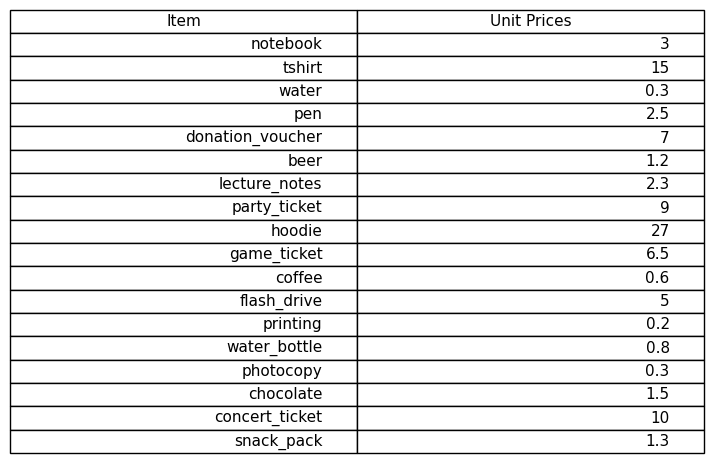

In [29]:
# Verifying if, besides the "RAND" values, there was any modification to the list of items and its prices
str_items2, item_prices2 = list_and_price_table(dataset)

In [30]:
# Compare the lists
diff_str_items = [item for item in str_items if item not in str_items2]
diff_str_items2 = [item for item in str_items2 if item not in str_items]

print("Items in str_items but not in str_items2:", diff_str_items)
print("Items in str_items2 but not in str_items:", diff_str_items2)

# Compare the dictionaries
diff_keys_item_prices = [element for element in item_prices.values() if element not in item_prices2.values()]
diff_keys_item_prices2 = [key for key in item_prices2 if key not in item_prices]

print("Items in item_prices but not in item_prices2:", diff_keys_item_prices)
print("Items in item_prices2 but not in item_prices:", diff_keys_item_prices2)

# Compare the values of common keys
value_differences = {
    key: (item_prices[key], item_prices2[key]) 
    for key in item_prices 
    if key in item_prices2 and item_prices[key] != item_prices2[key]
}

print("Items with different prices:", value_differences)           

Items in str_items but not in str_items2: ['RAND']
Items in str_items2 but not in str_items: []
Items in item_prices but not in item_prices2: [['RAND', None]]
Items in item_prices2 but not in item_prices: []
Items with different prices: {}


There was no value added to the lists and the table, meaning that the executed alterations did not interfere with the existent items and its prices.

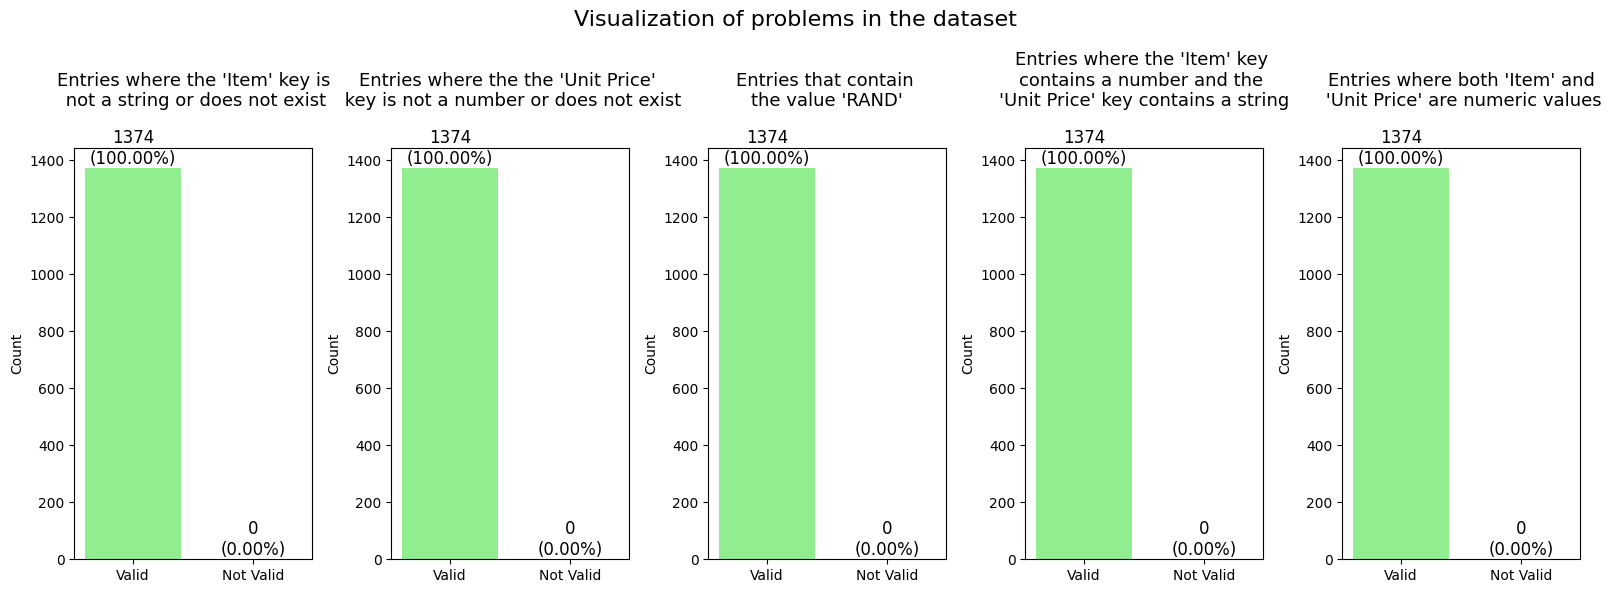

In [31]:
# Execute the function that graphs the identified problems in the dataset (defined in SECTION 1) 

# New Count of "Item" keys that are str vs the ones that are not
item_str_count2 = is_item_string(dataset)
# New count of "Unit Price" keys that are numbers vs the ones that assume other values
unitprice_number_count2 = is_unitprice_number(dataset)
#New count of existing "RAND"
rand_counter2 = has_rand(dataset)
# New count of entries where the 'Item' key contains a number and the 'Unit Price' key contains a string
iu_switched_counter2 = item_and_unit_price_switched(dataset)
# New count of entries where both 'Item' and 'Unit Price' are numeric values
number_number_counter2 = number_number(dataset)

show_problems(dataset, item_str_count2, unitprice_number_count2, rand_counter2, iu_switched_counter2, number_number_counter2)

# Section 3: Extraction of Information

### Extraction of recency, frequency and monetary values

In [32]:
extracted_dataset = []

In [33]:
# Reference date (current date): March 1st
current_year, current_month, current_day = 2024, 3, 1

# Function to check if a year is a leap year
def is_leap_year(year):
    """
    Determines if a given year is a leap year.

    Parameters:
    year (int): The year to check.

    Returns:
    bool: True if the year is a leap year, False otherwise.
    """
    # A year is a leap year if it is divisible by 4 and not divisible by 100,
    # unless it is also divisible by 400.
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Function to calculate the number of days in a given month
def days_in_month(year, month):
    """
    Returns the number of days in a given month of a given year.

    Parameters:
    year (int): The year to check (used to determine if it's a leap year).
    month (int): The month (1-12) for which to find the number of days.

    Returns:
    int: The number of days in the specified month.
    """
    # List of days in each month for a common year
    days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    # Check if the month is February and if the year is a leap year
    if month == 2 and is_leap_year(year):
        return 29
    # Return the number of days in the specified month
    return days_in_month[month - 1]

# Function to calculate the number of days from a given date to the reference date
def days_since_date(year, month, day, current_year, current_month, current_day):
    """
    Calculates the number of days between a given date and the current date.

    Parameters:
    year (int): The starting year.
    month (int): The starting month (1-12).
    day (int): The starting day (1-31).
    current_year (int): The current year.
    current_month (int): The current month (1-12).
    current_day (int): The current day (1-31).

    Returns:
    int: The number of days between the given date and the current date.
    """
    days = 0
    # Calculate days from years
    for y in range(year, current_year):
        days += 366 if is_leap_year(y) else 365
    # Calculate days from months
    for m in range(1, current_month):
        days += days_in_month(current_year, m)
    for m in range(1, month):
        days -= days_in_month(year, m)
    # Calculate days from days
    days += current_day - day
    return days

# Dictionary to store recency
recency = {}

for item in dataset:
    name = item["Name"]
    date = item["Date"]
    day, month, year = map(int, date.split('-'))
    
    # Calculate recency in days
    recency_days = days_since_date(year, month, day, current_year, current_month, current_day)
    
    # Update the recency in the dictionary
    if name not in recency or recency_days < recency[name]:
        recency[name] = recency_days

In [34]:
#Calculate the frequency - number of purchases made by each customer
frequency = {}
for item in dataset:
    name = item["Name"]
    # Add the name, if not in the dictionary yet, and the number of purchases made by each customer
    if name not in frequency:
        frequency[name] = 1
    else:
        frequency[name] += 1

In [35]:
#Calculate the monetary value - total amount spent by each customer
monetary = {}
for item in dataset:
    name = item["Name"]
    
    # Calculate the total cost of the current transaction
    price = item["Unit Price"] * item["Quantity"]
    
    # Add the price to the customer's total monetary value
    if name in monetary:
        monetary[name] += price
        monetary[name] = round(monetary[name], 2)
    else:
        monetary[name] = round(price,2)

In [36]:
# Initialize an empty list to store the combined data
extracted_dataset = []

# Iterate over each name in the keys of the recency dictionary
for name in recency.keys():
    # Create a dictionary for each customer combining recency, frequency, and monetary value
    customer_data = {
        'Name': name,
        'Recency': recency[name],
        'Frequency': frequency[name],
        'Monetary Value': monetary[name]
    }
    # Append the customer data to the extracted dataset list
    extracted_dataset.append(customer_data)

### Histograms

In [37]:
# Extract values for plotting
recency_values = list(recency.values())
frequency_values = list(frequency.values())
monetary_values = list(monetary.values())

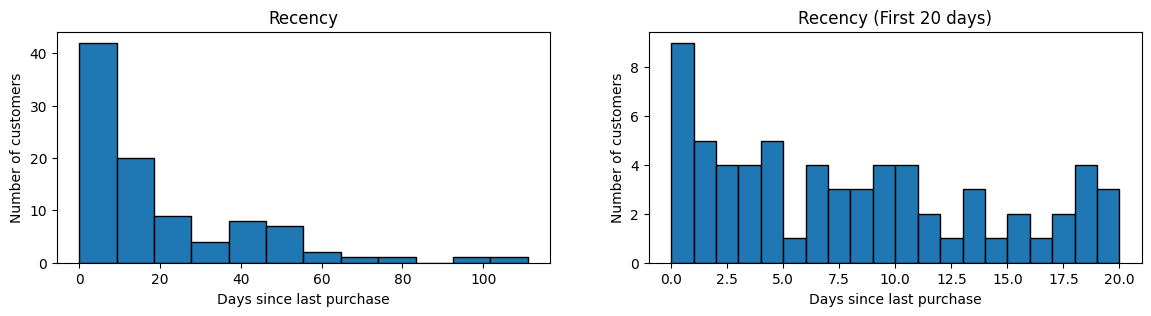

In [38]:
# Recency histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

ax1.hist(recency_values, bins=12, edgecolor='black')
ax1.set_title('Recency')
ax1.set_xlabel('Days since last purchase')
ax1.set_ylabel('Number of customers')

# Histogram focusing on the first 20 days
ax2.hist([x for x in recency_values if x <= 20], bins=20, edgecolor='black')
ax2.set_title('Recency (First 20 days)')
ax2.set_xlabel('Days since last purchase')
ax2.set_ylabel('Number of customers')

plt.show()

A significant number of customers (around 40) made their last purchase very recently (0-10 days ago). This indicates that a large portion of the customer base is actively purchasing.<br><b>As the number of days since the last purchase increases, the number of customers decreases. </b><br> There is a noticeable drop after around 10 days, with fewer customers making purchases as the days increase. <br>There are fluctuations in the number of customers with no consistent decreasing or increasing pattern within the first 20 days.

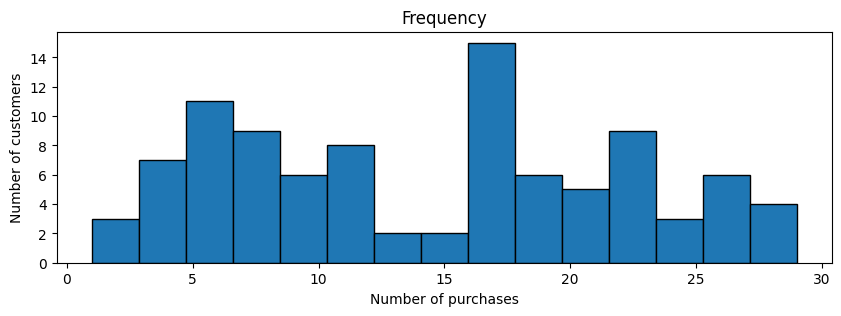

In [39]:
# Frequency histogram
fig, ax =plt.subplots(figsize=(10,3))
ax.hist(frequency_values, bins=15, edgecolor='black')
plt.title('Frequency')
plt.xlabel('Number of purchases')
plt.ylabel('Number of customers')
plt.show()

The highest number of customers has made around 16 purchases, indicating a significant portion of the customer base is moderately active. Secondary peaks occur around 5 and 22 purchases.

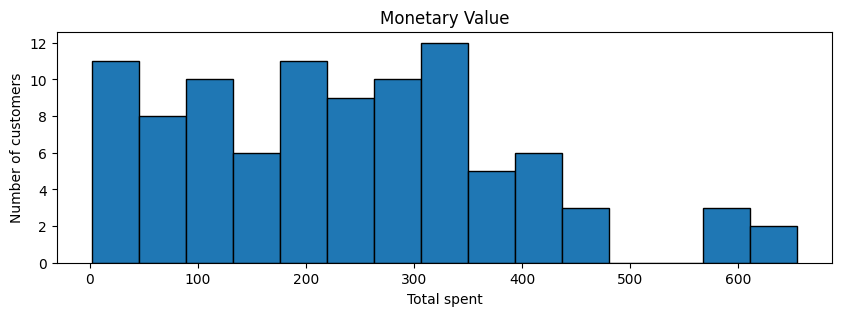

In [40]:
# Monetary Value histogram
fig, ax =plt.subplots(figsize=(10,3))
ax.hist(monetary_values, bins=15, edgecolor='black')
plt.title('Monetary Value')
plt.xlabel('Total spent')
plt.ylabel('Number of customers')
plt.show()

This histogram indicates that most customers tend to spend less, with the majority spending between 0 and 350. The number of customers decreases significantly as the total amount spent increases.

# Section 4: Sorting

### First RFM scores (RFM)

In [41]:
def merge(left, right, key, ascending=True):
    """
    Merges two sorted lists into one sorted list based on a specified key.

    Parameters:
    left (list): The first sorted sublist.
    right (list): The second sorted sublist.
    key (str): The key to sort by.
    ascending (bool): Determines if sorting is in ascending order (default is True).

    Returns:
    list: A merged and sorted list.
    """
    sorted_list = []
    i = j = 0
    # Merge the two sublists while both have elements
    while i < len(left) and j < len(right):
        if (left[i][key] < right[j][key]) if ascending else (left[i][key] > right[j][key]):
            sorted_list.append(left[i])
            i +=1
        else:
            sorted_list.append(right[j])
            j+=1
    # Append any remaining elements from left and right
    return [*sorted_list, *left[i:], *right[j:]]

def merge_sort(seq, key, ascending=True):
    """
    Sorts a list using the merge sort algorithm based on a specified key.

    Parameters:
    seq (list): The list to be sorted.
    key (str): The key to sort by.
    ascending (bool): Determines if sorting is in ascending order (default is True).

    Returns:
    list: The sorted list.
    """
    if len(seq) ==1:
        return seq

    # Divide the list into two halves
    idx_half = len(seq)//2
    right = merge_sort(seq[idx_half:], key, ascending)
    left = merge_sort(seq[:idx_half], key, ascending)
    
    # Merge the sorted halves
    return merge(left, right, key, ascending)


def assign_rfm(sorted_dataset, key, ordered_key):
    """
    Assigns RFM ranking by key to a sorted dataset.

    Parameters:
    sorted_dataset (list of dict): The dataset sorted by the ordered key.
    key (str): The key to store the RFM ranking.
    ordered_key (str): The key used to order the dataset.

    Returns:
    list of dict: The dataset with RFM ranking assigned.
    """
    n = len(sorted_dataset)
    # Determine the size of each third of the dataset
    third_division = n // 3
    two_third_division = 2 * third_division
    last_value_1, last_value_2 = "", ""

    for i, record in enumerate(sorted_dataset):
        # Assign RFM value based on the position in the sorted list
        if i < third_division:
            # First third of the dataset
            rfm_value = "3"
            last_value_1 = record[ordered_key] # Track the last value in this third for comparison
            
        elif i < two_third_division:
            # Second third of the dataset
            # If the current value matches the last value of the first third, assign "3"
            # Otherwise, assign "2"
            rfm_value = "3" if record[ordered_key] == last_value_1 else "2"
            last_value_2 = record[ordered_key] # Track the last value in this third for comparison
            
        else:
            # Last third of the dataset
            # If the current value matches the last value of the second third, assign "2"
            # Otherwise, assign "1"
            rfm_value = "2" if record[ordered_key] == last_value_2 else "1"

        record[key] = record.get(key, '') + rfm_value

    return sorted_dataset

In [42]:
# Sorting and assigning RFM for Recency (lowest values get highest RFM)
sorted_dataset = merge_sort(extracted_dataset, key='Recency', ascending=True)
sorted_dataset_with_rfm = assign_rfm(sorted_dataset, "RFM", 'Recency')

# Sorting and assigning RFM for Frequency (highest values get highest RFM)
sorted_dataset = merge_sort(extracted_dataset, key='Frequency', ascending=False)
sorted_dataset_with_rfm = assign_rfm(sorted_dataset, "RFM", 'Frequency')

# Sorting and assigning RFM for Monetary Value (highest values get highest RFM)
sorted_dataset = merge_sort(extracted_dataset, key='Monetary Value', ascending=False)
sorted_dataset_with_rfm = assign_rfm(sorted_dataset, "RFM", 'Monetary Value')

In [43]:
# Sorting the dataset by RFM, in descending order
info_dataset = merge_sort(sorted_dataset_with_rfm, key='RFM', ascending=False)
for i in info_dataset:
    print(i)

{'Name': 'André', 'Recency': 2, 'Frequency': 23, 'Monetary Value': 307.0, 'RFM': '333'}
{'Name': 'Carolina', 'Recency': 1, 'Frequency': 25, 'Monetary Value': 348.5, 'RFM': '333'}
{'Name': 'Ashool', 'Recency': 0, 'Frequency': 29, 'Monetary Value': 376.8, 'RFM': '333'}
{'Name': 'Eduardo', 'Recency': 1, 'Frequency': 28, 'Monetary Value': 419.0, 'RFM': '333'}
{'Name': 'Tiago', 'Recency': 2, 'Frequency': 26, 'Monetary Value': 421.3, 'RFM': '333'}
{'Name': 'Iurii', 'Recency': 4, 'Frequency': 24, 'Monetary Value': 441.5, 'RFM': '333'}
{'Name': 'Bernardo', 'Recency': 3, 'Frequency': 28, 'Monetary Value': 573.2, 'RFM': '333'}
{'Name': 'Carlos', 'Recency': 0, 'Frequency': 27, 'Monetary Value': 581.8, 'RFM': '333'}
{'Name': 'Pedro', 'Recency': 4, 'Frequency': 18, 'Monetary Value': 233.4, 'RFM': '332'}
{'Name': 'Henrique', 'Recency': 4, 'Frequency': 28, 'Monetary Value': 265.7, 'RFM': '332'}
{'Name': 'Hamim', 'Recency': 0, 'Frequency': 22, 'Monetary Value': 287.7, 'RFM': '332'}
{'Name': 'João', 'R

- Can you determine which students are most valuable to our SU, considering that our
organization is evil and values students solely based on their purchase history?

Answer: 

The most valuable students to our SU are the ones with a RFM score of 333, meaning that they belong to the 1/3 of students that more recently made purchases, to the 1/3 that has more frequently visited the SU and to the 1/3 that has spent more money with the SU.

### Second RFM Scores (RFM')

In [44]:
def calculate_rfm2(students):
    """
    Calculates the RFM2 (Recency, Frequency, Monetary) ranking for a list of students.

    Parameters:
    students (list of dict): A list of student dictionaries where each dictionary contains 'Recency', 'Frequency', and 'Monetary Value' keys.

    Returns:
    list: A list of students with RFM2 ranking applied.
    """
    # Step 1: Rank by Recency (The first key in RFM already divides the recency in 3 "buckets")
    # Sort students by Recency in ascending order
    students = merge_sort(students, key='Recency', ascending=True)
    # Assign RFM2 ranking based on Recency
    students = assign_rfm(students, 'RFM2','Recency')
        
    # Step 2: Rank by Frequency within each Recency bucket
    # Initialize Recency buckets to hold students divided by Recency rank
    recency_buckets = [[], [], []]
    for student in students:
        # Place students into appropriate Recency bucket
        if student['RFM2'][0] == '3':
            recency_buckets[0].append(student)
        elif student['RFM2'][0] == '2':
            recency_buckets[1].append(student)
        else:
            recency_buckets[2].append(student)

    # Sort and rank students by Frequency within each Recency bucket
    for i in range(3):
        recency_buckets[i] = merge_sort(recency_buckets[i], key='Frequency', ascending=False)
        recency_buckets[i] = assign_rfm(recency_buckets[i], 'RFM2', 'Frequency')

    # Step 3: Rank by Monetary within each Frequency bucket
    # Initialize final list to hold sorted and ranked students
    final_list = []
     # Iterate over students within each Recency bucket
    for bucket in recency_buckets:
        # Initialize Frequency buckets to hold students divided by Frequency rank
        frequency_buckets = [[], [], []]
        for student in bucket:
            # Place students into appropriate Frequency bucket
            if student['RFM2'][1] == '3':
                frequency_buckets[0].append(student)
            elif student['RFM2'][1] == '2':
                frequency_buckets[1].append(student)
            else:
                frequency_buckets[2].append(student)

        # Sort and rank students by Monetary Value within each Frequency bucket
        for i in range(3):
            frequency_buckets[i] = merge_sort(frequency_buckets[i], key='Monetary Value', ascending=False)
            frequency_buckets[i] = assign_rfm(frequency_buckets[i], 'RFM2', 'Monetary Value')

        # Extend the final list with students from each Frequency bucket
        for fb in frequency_buckets:
            final_list.extend(fb)

     # Return the final list of students with RFM2 ranking applied
    return final_list

calculate_rfm2(info_dataset)

[{'Name': 'Carlos',
  'Recency': 0,
  'Frequency': 27,
  'Monetary Value': 581.8,
  'RFM': '333',
  'RFM2': '333'},
 {'Name': 'Bernardo',
  'Recency': 3,
  'Frequency': 28,
  'Monetary Value': 573.2,
  'RFM': '333',
  'RFM2': '333'},
 {'Name': 'Iurii',
  'Recency': 4,
  'Frequency': 24,
  'Monetary Value': 441.5,
  'RFM': '333',
  'RFM2': '333'},
 {'Name': 'Tiago',
  'Recency': 2,
  'Frequency': 26,
  'Monetary Value': 421.3,
  'RFM': '333',
  'RFM2': '332'},
 {'Name': 'Eduardo',
  'Recency': 1,
  'Frequency': 28,
  'Monetary Value': 419.0,
  'RFM': '333',
  'RFM2': '332'},
 {'Name': 'Ashool',
  'Recency': 0,
  'Frequency': 29,
  'Monetary Value': 376.8,
  'RFM': '333',
  'RFM2': '332'},
 {'Name': 'Carolina',
  'Recency': 1,
  'Frequency': 25,
  'Monetary Value': 348.5,
  'RFM': '333',
  'RFM2': '331'},
 {'Name': 'André',
  'Recency': 2,
  'Frequency': 23,
  'Monetary Value': 307.0,
  'RFM': '333',
  'RFM2': '331'},
 {'Name': 'Hamim',
  'Recency': 0,
  'Frequency': 22,
  'Monetary Valu

### Correlation

Spearmans correlation coefficient: 0.981
Samples are correlated p=0.000


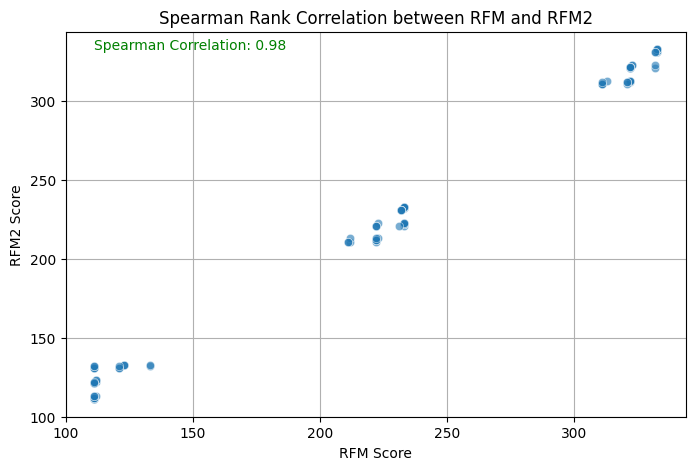

In [45]:
# Extract RFM and RFM2 scores from info_dataset
rfm_scores = [int(student['RFM']) for student in info_dataset]
rfm2_scores = [int(student['RFM2']) for student in info_dataset]


# Calculate Spearman's correlation coefficient between RFM and RFM2 scores
coef, p = stats.spearmanr(rfm_scores, rfm2_scores)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated p=%.3f' % p)
else:
 print('Samples are correlated p=%.3f' % p)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(rfm_scores, rfm2_scores, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Spearman Rank Correlation between RFM and RFM2')
plt.xlabel('RFM Score')
plt.ylabel('RFM2 Score')
plt.grid(True)
plt.text(min(rfm_scores), max(rfm2_scores), f'Spearman Correlation: {coef:.2f}', fontsize=10, color='green')
plt.show()

# Section 5: Searching

### Linear Search

In [46]:
names_to_find = ["Carolina", "Catarina", "Matilde"]

In [47]:
def linear_search(info_dataset, names_to_find):
    """
    Performs a linear search to find names in a dataset.

    Parameters:
    info_dataset (list of dict): The dataset where each entry is a dictionary containing a 'Name' key.
    names_to_find (list of str): The list of names to search for in the dataset.

    Returns:
    list: A list of the found entries corresponding to the names to find.
    """
    linear_result = []
    # Iterate over each element in the dataset
    for element in extracted_dataset:
        # Check if the element's 'Name' is in the list of names to find
        if element["Name"] in names_to_find:
            # Add the matching element to the result list
            linear_result.append(element)
    return linear_result

linear_search(info_dataset, names_to_find)

[{'Name': 'Carolina',
  'Recency': 1,
  'Frequency': 25,
  'Monetary Value': 348.5,
  'RFM': '333',
  'RFM2': '331'},
 {'Name': 'Matilde',
  'Recency': 8,
  'Frequency': 7,
  'Monetary Value': 60.7,
  'RFM': '211',
  'RFM2': '211'},
 {'Name': 'Catarina',
  'Recency': 69,
  'Frequency': 3,
  'Monetary Value': 83.5,
  'RFM': '111',
  'RFM2': '113'}]

- Who do you think is the best student/customer among your group?

Answer:

The best student customer among our group is Carolina!

### Alphabetical Sorting

In [48]:
# Function to alphabeticaly sort the extracted dataset
def alphabetical_sorting(dataset):
    """
    Sorts a given dataset alphabetically by the 'Name' field.

    Parameters:
    dataset (list of dictionaries): The dataset to be sorted. It should be a list of dictionaries with a 'Name' field.

    Returns:
    list: The sorted dataset with entries ordered alphabetically by 'Name'.
    """
    return merge_sort(info_dataset, key='Name', ascending=True)

alpha_dataset = alphabetical_sorting(info_dataset)

# Print the sorted dataset
for customer in alpha_dataset:
    print(customer)

{'Name': 'Abdul', 'Recency': 2, 'Frequency': 15, 'Monetary Value': 110.3, 'RFM': '321', 'RFM2': '312'}
{'Name': 'Adriana', 'Recency': 60, 'Frequency': 4, 'Monetary Value': 188.5, 'RFM': '112', 'RFM2': '113'}
{'Name': 'Aleksei', 'Recency': 42, 'Frequency': 4, 'Monetary Value': 21.0, 'RFM': '111', 'RFM2': '112'}
{'Name': 'Alexandre', 'Recency': 6, 'Frequency': 15, 'Monetary Value': 240.4, 'RFM': '322', 'RFM2': '313'}
{'Name': 'Andre', 'Recency': 20, 'Frequency': 5, 'Monetary Value': 155.7, 'RFM': '212', 'RFM2': '211'}
{'Name': 'Andrey', 'Recency': 0, 'Frequency': 11, 'Monetary Value': 163.2, 'RFM': '322', 'RFM2': '312'}
{'Name': 'Andrii', 'Recency': 54, 'Frequency': 2, 'Monetary Value': 13.5, 'RFM': '111', 'RFM2': '112'}
{'Name': 'André', 'Recency': 2, 'Frequency': 23, 'Monetary Value': 307.0, 'RFM': '333', 'RFM2': '331'}
{'Name': 'Angelo', 'Recency': 3, 'Frequency': 16, 'Monetary Value': 456.5, 'RFM': '323', 'RFM2': '323'}
{'Name': 'Ansh', 'Recency': 78, 'Frequency': 4, 'Monetary Value'

### Binary Search

In [49]:
def binary_search(alpha_dataset, names_to_find):
    """
    Performs a binary search to find names in an alphabetically sorted dataset.

    Parameters:
    alpha_dataset (list of dict): The sorted dataset where each entry is a dictionary containing a 'Name' key.
    names_to_find (list of str): The list of names to search for in the dataset.

    Returns:
    list: A list of the found entries corresponding to the names to find. If a name is not found, None is appended in its place.
    """
    results = []
    # Iterate over each name to find
    for name in names_to_find:
        # Initialize binary search boundaries
        idx_start, idx_end = 0, len(alpha_dataset) - 1
        found = False

        # Perform binary search
        while idx_start <= idx_end:
            idx_half = (idx_start + idx_end) // 2
            current_name = alpha_dataset[idx_half]['Name']
            
            if name == current_name: # Name found
                results.append(alpha_dataset[idx_half])
                found = True
                break
            elif name > current_name: # Search in the right half
                idx_start = idx_half + 1
            else: # Search in the left half
                idx_end = idx_half - 1
                
        if not found: # Name not found in the dataset
            results.append(None)

    return results

binary_search(alpha_dataset, names_to_find)

[{'Name': 'Carolina',
  'Recency': 1,
  'Frequency': 25,
  'Monetary Value': 348.5,
  'RFM': '333',
  'RFM2': '331'},
 {'Name': 'Catarina',
  'Recency': 69,
  'Frequency': 3,
  'Monetary Value': 83.5,
  'RFM': '111',
  'RFM2': '113'},
 {'Name': 'Matilde',
  'Recency': 8,
  'Frequency': 7,
  'Monetary Value': 60.7,
  'RFM': '211',
  'RFM2': '211'}]

- How much time, in terms of seconds, did it take to find a name using linear search and
binary search? Compare the results. (You can use the timeit module.)

Answer:

In [50]:
# Code snippets to be executed only once
linear_search_setup = '''
from __main__ import linear_search, alpha_dataset, names_to_find
'''

binary_search_setup = '''
from __main__ import binary_search, alpha_dataset, names_to_find
'''

# Measure the execution time of linear_search
linear_search_time = timeit.timeit('linear_search(alpha_dataset, names_to_find)', setup=linear_search_setup, number=10000)
print(f'Linear Search Time: {linear_search_time:.3f} seconds')

# Measure the execution time of binary_search
binary_search_time = timeit.timeit('binary_search(alpha_dataset, names_to_find)', setup=binary_search_setup, number=10000)
print(f'Binary Search Time: {binary_search_time:.3f} seconds')

Linear Search Time: 0.191 seconds
Binary Search Time: 0.061 seconds


<hr>
Great job, congrats!